In [11]:
%load_ext autoreload
%autoreload 1
from useful_functions import *
from emceeHammer import *
import ast
from varname import nameof
savePNG = True ## Changes matplotlib backend to save plots as pgf (default:True)
if savePNG:
    mpl.use("agg")
    plotExtension = str('.png')
elif not savePNG:
    mpl.use("pgf")
    mpl.rcParams.update({
        "pgf.texsystem": "pdflatex",
        'font.family': 'serif',
        'text.usetex': True,
        'pgf.rcfonts': False,})
    plotExtension = str('.pgf')

notebookPlotFlag = True ## Changes Jupyter plotting backend (default:True)
if notebookPlotFlag:
    %matplotlib notebook
elif not notebookPlotFlag:
    %matplotlib inline
np.random.seed(1006)

tess_2020bpi = pd.read_csv('JhaData/TESS_SN2020bpi.csv')[::2].reset_index(drop=True)
tess_2020bpi_norm = normLC(tess_2020bpi)
#tess_2020bpi['mjd_0'] = tess_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
fluxNorm = 0.4*np.max(tess_2020bpi['flux'])

tess_2020bpi_s21_a_mcmc = pd.read_csv('./JhaData/TESS_SN2020bpi_s21_a_MCMC.csv')
tess_2020bpi_s21_a_mcmc_norm = normLC(tess_2020bpi_s21_a_mcmc)

##ZTF Data
ztf_2020bpi = pd.read_csv('JhaData/ztf_SN2020bpi.csv')
ztf_2020bpi['mjd_0'] = ztf_2020bpi['mjd'] - tess_2020bpi['mjd'].min()
## Note: setting the zero value of mjd_0 to that of TESS for consitency 
ztf_2020bpi['e_flux_tuple'] = ztf_2020bpi['e_flux']
ztf_2020bpi['e_flux'] = [
    np.mean(ast.literal_eval(flux))
    for flux in ztf_2020bpi['e_flux'].to_numpy()]

compFlux = pd.read_csv('CompanionEmission(Reformat).csv')
display(compFlux)
display(tess_2020bpi_norm)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,time,f50,m50,f25,m25,f10,m10,f5,m5,f1,m1,f0.5,m0.5,f0.1,m0.1
0,0.001023,0.006878,25.8464,0.005772,26.0367,0.004573,26.2895,0.003825,26.4835,0.002537,26.9293,0.002121,27.1239,0.001392,27.5807
1,0.022361,0.163347,22.4072,0.135896,22.6070,0.106148,22.8752,0.087604,23.0837,0.055745,23.5745,0.045491,23.7952,0.027665,24.3352
2,0.043699,0.320540,21.6753,0.265446,21.8801,0.205781,22.1565,0.168622,22.3727,0.104925,22.8878,0.084504,23.1228,0.049251,23.7090
3,0.065037,0.476072,21.2458,0.392814,21.4545,0.302707,21.7374,0.246644,21.9598,0.150757,22.4943,0.120139,22.7408,0.067651,23.3643
4,0.086375,0.629687,20.9422,0.517945,21.1543,0.397088,21.4428,0.321967,21.6705,0.193776,22.2217,0.153006,22.4782,0.083604,23.1344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,16.281848,21.303393,17.1189,11.464799,17.7916,4.334410,18.8477,1.790086,19.8078,0.132666,22.6331,0.031510,24.1939,0.000427,28.8646
764,16.303186,21.299008,17.1191,11.458494,17.7922,4.329609,18.8489,1.787183,19.8096,0.132250,22.6365,0.031385,24.1982,0.000424,28.8717
765,16.324524,21.294604,17.1193,11.452184,17.7928,4.324812,18.8501,1.784284,19.8113,0.131835,22.6399,0.031260,24.2025,0.000421,28.8787
766,16.345862,21.290181,17.1196,11.445869,17.7934,4.320019,18.8513,1.781390,19.8131,0.131422,22.6433,0.031136,24.2068,0.000418,28.8858


,BTJD,mjd,cts,e_cts,bkg_model,raw_flux,e_raw_flux,bkg_model_flux,flux,e_flux,mjd_0
0,1870.44408,58869.94408,-5339.0302,1368.8706,1502.1435,-0.564845,0.144820,0.008627,0.031784,0.138169,0.00000
1,1870.46491,58869.96491,-6841.1413,1375.3282,1502.1435,-0.723761,0.145503,0.008627,-0.119834,0.138821,0.02083
2,1870.48574,58869.98574,-2219.7583,1400.7610,1501.2344,-0.234840,0.148194,0.008622,0.346737,0.141388,0.04166
3,1870.50658,58870.00658,-10843.6913,1370.6601,1501.2344,-1.147213,0.145010,0.008622,-0.523734,0.138350,0.06250
4,1870.52741,58870.02741,-9069.4821,1365.9754,1501.2344,-0.959510,0.144514,0.008622,-0.344651,0.137877,0.08333
...,...,...,...,...,...,...,...,...,...,...,...
2402,1926.38043,58925.88043,-5376.2935,1103.0225,-1019.9026,-0.568787,0.116695,-0.005857,0.837084,0.059706,55.93635
2403,1926.40126,58925.90126,-2451.5298,1092.4653,-1019.9026,-0.259361,0.115578,-0.005857,0.995400,0.059135,55.95718
2404,1926.42209,58925.92209,-4802.3999,1094.4606,-1019.9026,-0.508072,0.115789,-0.005857,0.868148,0.059243,55.97801
2405,1926.44293,58925.94293,-5526.9100,1078.8450,-1019.9026,-0.584722,0.114137,-0.005857,0.828931,0.058397,55.99885


<IPython.core.display.Javascript object>


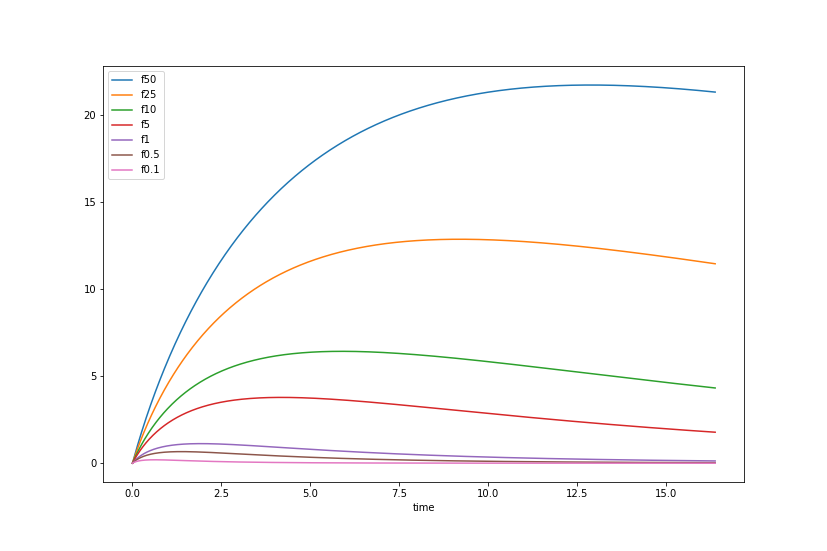

In [10]:
ax = compFlux.plot('time','f50')
compFlux.plot('time','f25',ax=ax)
compFlux.plot('time','f10',ax=ax)
compFlux.plot('time','f5',ax=ax)
compFlux.plot('time','f1',ax=ax)
compFlux.plot('time','f0.5',ax=ax)
compFlux.plot('time','f0.1',ax=ax)